<a href="https://colab.research.google.com/github/sanvasu/Netflix---Data-Exploration-and-Visualisation/blob/main/Netflix_Casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('netflix.csv')

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**BASIC ANALYSIS**
1. Un-nesting the columns,
    *In casr,listed_in_country and director columns there are same column with multiple comma seperated values.
    So used the str.split function to un-nest and used explode method to convert each element of a column into multiple rows.*


In [5]:
df['cast'] = df['cast'].str.split(',')
df['listed_in'] = df['listed_in'].str.split(',')
df['country'] = df['country'].str.split(',')
df['director'] = df['director'].str.split(',')

In [6]:
df = df.explode('cast').explode('listed_in').explode('country').explode('director').reset_index(drop=True)

**BASIC ANALYSIS **

Used df.info() method to find the datatype of each column

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202065 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       202065 non-null  object
 1   type          202065 non-null  object
 2   title         202065 non-null  object
 3   director      151422 non-null  object
 4   cast          199916 non-null  object
 5   country       190168 non-null  object
 6   date_added    201907 non-null  object
 7   release_year  202065 non-null  int64 
 8   rating        201998 non-null  object
 9   duration      202062 non-null  object
 10  listed_in     202065 non-null  object
 11  description   202065 non-null  object
dtypes: int64(1), object(11)
memory usage: 18.5+ MB


In [8]:
df_obj = df.select_dtypes('object')

Used strip method to remove the trailing whtespaces.

In [9]:
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

In [10]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,50643
cast,2149
country,11897
date_added,158
release_year,0
rating,67
duration,3


After removed the white space, we can find some columns have null values. So inorder to replace the null values, used replace function for the selected columns.

In [11]:
df['director'] = df['director'].replace(np.nan, 'Unknown director')
df['cast'] = df['cast'].replace(np.nan, 'Unknown cast')
df['country'] = df['country'].replace(np.nan, 'Unknown country')
df['date_added'] = df['date_added'].replace(np.nan, 'Unknown date')
df['rating'] = df['rating'].replace(np.nan, 'Unknown rating')
df['duration'] = df['duration'].replace(np.nan, 'Unknown duration')

In [12]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


Now, the data is all clear without null and any whitespaces.

In [13]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Unknown director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


Finding categorical variable both using graphical and non-graphical analysis.

In a Non-Graphical Analysis:

In [14]:
category_coumn = ['show_id','type','title','director','cast','country','date_added','rating','duration','listed_in']
for column in category_coumn:
    print("Value counts for column '{}':".format(column))
    print(df[column].value_counts())
    print("\n")

Value counts for column 'show_id':
show_id
s7165    700
s6985    504
s7516    468
s2554    416
s5306    378
        ... 
s6330      1
s8176      1
s937       1
s3387      1
s1         1
Name: count, Length: 8807, dtype: int64


Value counts for column 'type':
type
Movie      145917
TV Show     56148
Name: count, dtype: int64


Value counts for column 'title':
title
Kahlil Gibran's The Prophet    700
Holidays                       504
Movie 43                       468
The Eddy                       416
Narcos                         378
                              ... 
Blackfish                        1
The 2000s                        1
Miniforce: Super Dino Power      1
Dancing with the Birds           1
Dick Johnson Is Dead             1
Name: count, Length: 8806, dtype: int64


Value counts for column 'director':
director
Unknown director       50643
Martin Scorsese          419
Youssef Chahine          409
Cathy Garcia-Molina      356
Steven Spielberg         355
               

**In Graphical Analysis:** For graphical analysis, the null caolumns which we replace with unknown are excluded before showing the result.

**Insights:** From the below graphs we can identify, netflix have more number of movies than Tv-shows. Unites states produce more number of Movies/Tv-Shows and more number of Movies/Tv-Shows are added in 2018.

<Axes: xlabel='count', ylabel='listed_in'>

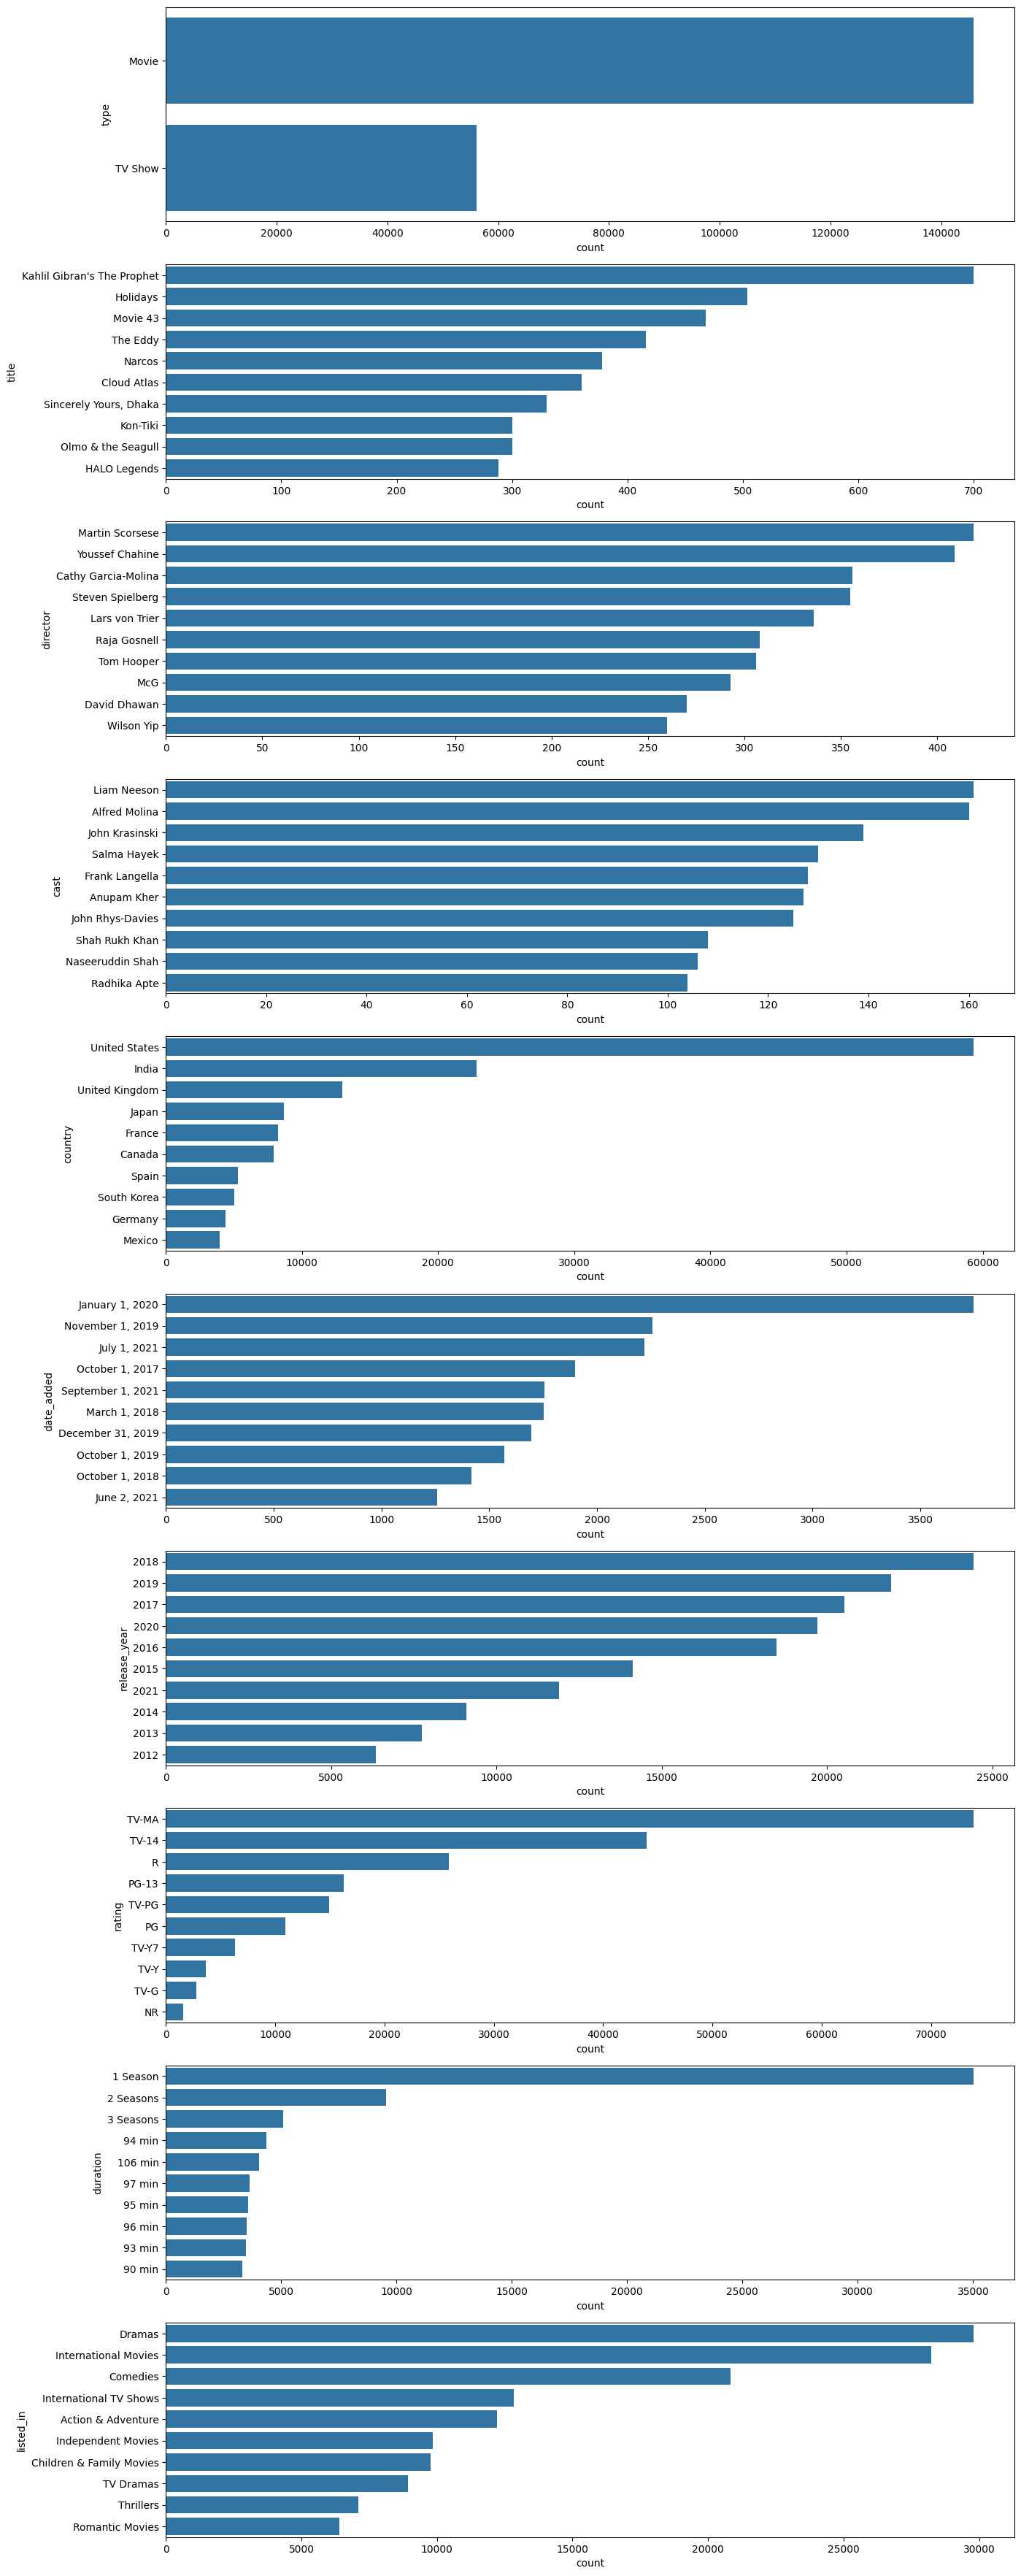

In [15]:
fig = plt.figure(figsize=(15,45))
plt.subplot(10, 1, 1)
sns.countplot(y ='type', data=df,order=df.type.value_counts().iloc[:10].index)
plt.subplot(10, 1, 2)
sns.countplot(y ='title', data=df,order=df.title.value_counts().iloc[:10].index)
plt.subplot(10, 1,3)
sns.countplot(y ='director', data=df[-(df.director == 'Unknown director')],order=df.director[df['director'] != 'Unknown director'].value_counts().iloc[:10].index)
plt.subplot(10, 1, 4)
sns.countplot(y ='cast', data=df[-(df.cast == 'Unknown cast')],order=df.cast[df['cast'] != 'Unknown cast'].value_counts().iloc[:10].index)
plt.subplot(10, 1,5)
sns.countplot(y ='country', data=df[-(df.country == 'Unknown country')],order=df.country[df['country'] != 'Unknown country'].value_counts().iloc[:10].index)
plt.subplot(10, 1, 6)
sns.countplot(y ='date_added', data=df[-(df.date_added == 'Unknown date')],order=df.date_added[df['date_added'] != 'Unknown date'].value_counts().iloc[:10].index)
plt.subplot(10, 1, 7)
sns.countplot(y ='release_year', data=df,order=df.release_year.value_counts().iloc[:10].index)
plt.subplot(10, 1,8)
sns.countplot(y ='rating', data=df[-(df.rating == 'Unknown rating')],order=df.rating[df['rating'] != 'Unknown rating'].value_counts().iloc[:10].index)
plt.subplot(10, 1,9)
sns.countplot(y ='duration', data=df[-(df.duration == 'Unknown duration')],order=df.duration[df['duration'] != 'Unknown duration'].value_counts().iloc[:10].index)
plt.subplot(10, 1,10)
sns.countplot(y ='listed_in', data=df,order=df.listed_in.value_counts().iloc[:10].index)

**2. Comparison of tv shows vs. movies.**

For finding the top 10 country which produce more number of movies, first we can filter only Movie from type column and remove the 'Unknown country' as we no need to show this, then group by country along with title to get the unique values. After getting the unique value count,we can sort the top 10 descending value.

**Insights:** From the below data, we can know that United states produce more number of movies each year, followed by India and United Kingdom.

In [16]:
filter_movie = df.loc[df['type'] == 'Movie']
country_movie=filter_movie[-(filter_movie == 'Unknown country')]
country_movie = df.groupby('country')['title'].nunique()
top10_country = country_movie.sort_values(ascending=False).head(10)
top10_country

,title
country,
United States,3690
India,1046
Unknown country,831
United Kingdom,806
Canada,445
France,393
Japan,318
Spain,232
South Korea,231


*For finding the top 10 country which produce more number of Tv-Shows, first we can filter only Tv-Show from type column and remove the 'Unknown country' as we no need to show this, then group by country along with title to get the unique values. After getting the unique value count,we can sort the top 10 descending value.*

**Insights:** From the below data, we can know that United states produce more number of Tv-Shows each year, followed by United Kingdom and japan.

In [17]:
filter_tv_show = df.loc[df['type'] == 'TV Show']
filter_tv_show=filter_tv_show[-(filter_tv_show == 'Unknown country')]
tv_shows = filter_tv_show.groupby('country')['title'].nunique()
top10_tv_shows = tv_shows.sort_values(ascending=False).head(10)
top10_tv_shows

,title
country,
United States,938
United Kingdom,272
Japan,199
South Korea,170
Canada,126
France,90
India,84
Taiwan,70
Australia,66


**Best time to launch a TV show?**

To get the best time, first we start with remove the 'unknown date' column and convert the 'date_added' column to datetime variable and update to the same column. Once we converted we can get the week of the date using istocalendar() method.

In [18]:
filter_date = df.loc[-(df.date_added == 'Unknown date')]
df['date_added'] = pd.to_datetime(filter_date['date_added'])
df['week'] = df['date_added'].dt.isocalendar().week

*Once we get the week column for the date, we can filter the TV-Show from type and remove the 'Unknown Country' and do the value_counts from the filtered value.*

**Insights ** From the week from date_added column and filtering only the Tv-Shows from type it's clear that best time to launch a TV show in 27th week of the year, it have 1977 TV Shows over all produced that other weeks. 27th week is from july 7th of a year.

In [19]:
filter_tv_show = df.loc[df['type'] == 'TV Show']
filter_tv_show=filter_tv_show[-(filter_tv_show == 'Unknown country')]
filter_tv_show_week = filter_tv_show['week'].value_counts().sort_index()
filter_tv_show_week.idxmax()

27

**Insights** For releasing the movie it's clear that starting week of the year is the best time to release movies in all the provided years. Overall 8,456 movies are produced in 1st week of the year.

In [20]:
filter_movie = df.loc[df['type'] == 'Movie']
filter_movie_week = filter_movie['week'].value_counts().sort_index()
filter_movie_week.idxmax()

1

**Best month to release the Tv-show or the movie.**

To find the month, same like we did for week we can filter the month from the date_added column and do the value_counts for both Movie and Tv Shows category seperately.

In [21]:
df['month'] = df['date_added'].dt.month
filter_movie = df.loc[df['type'] == 'Movie']
filter_movie_month = filter_movie['month'].value_counts().sort_index()
filter_movie_month.idxmax().astype(int)

7

**Insights** For finding the best month to release the movie, we can conclude that July is the best month to release the movie.

In [22]:
df['month'] = df['date_added'].dt.month
filter_tv_show = df.loc[df['type'] == 'TV Show']
filter_tvshow_month = filter_tv_show['month'].value_counts().sort_index()
filter_tvshow_month.idxmax().astype(int)

12

**Insights** For finding the best month to release the TV Show, we can conclude that December is the best month to release the TV Show.

**Analysis of actors/directors of different types of shows/movies.**

 For finding the top 10 directors and actors, first we started with removing the 'unknown director' and 'unknwon actor' and group by director and actor along with title. Then we can sort the top 10 value in descending order.

In [23]:
filter_unknown_director = df[-(df == 'Unknown director')]
filter_director = filter_unknown_director.groupby('director')['title'].nunique()
top10_director_title = filter_director.sort_values(ascending=False).head(10)
top10_director_title

,title
director,
Rajiv Chilaka,22
Jan Suter,21
Raúl Campos,19
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,15
Cathy Garcia-Molina,13
Youssef Chahine,12
Jay Chapman,12


**Insights** From the given data it's clear that Rajiv Chilaka is the top direcctor having 22 Movies/Tv Shows added in the netflix, following Jan Suter and Raul Campos.

In [24]:
filter_unknown_actor = df[-(df == 'Unknown cast')]
filter_actor= filter_unknown_actor.groupby('cast')['title'].nunique()
top10_actor = filter_actor.sort_values(ascending=False).head(10)
top10_actor

,title
cast,
Anupam Kher,43
Shah Rukh Khan,35
Julie Tejwani,33
Naseeruddin Shah,32
Takahiro Sakurai,32
Rupa Bhimani,31
Om Puri,30
Akshay Kumar,30
Yuki Kaji,29


**Insights** From the given data we can conclude that Anupem Kher is the hero coming in top actor who appered in 43 times following Shah Rukh Khan and Julie Tejwani.

In [26]:
all_genres = ' '.join(df['listed_in'])
all_genres

"Documentaries International TV Shows TV Dramas TV Mysteries International TV Shows TV Dramas TV Mysteries International TV Shows TV Dramas TV Mysteries International TV Shows TV Dramas TV Mysteries International TV Shows TV Dramas TV Mysteries International TV Shows TV Dramas TV Mysteries International TV Shows TV Dramas TV Mysteries International TV Shows TV Dramas TV Mysteries International TV Shows TV Dramas TV Mysteries International TV Shows TV Dramas TV Mysteries International TV Shows TV Dramas TV Mysteries International TV Shows TV Dramas TV Mysteries International TV Shows TV Dramas TV Mysteries International TV Shows TV Dramas TV Mysteries International TV Shows TV Dramas TV Mysteries International TV Shows TV Dramas TV Mysteries International TV Shows TV Dramas TV Mysteries International TV Shows TV Dramas TV Mysteries International TV Shows TV Dramas TV Mysteries Crime TV Shows International TV Shows TV Action & Adventure Crime TV Shows International TV Shows TV Action & A

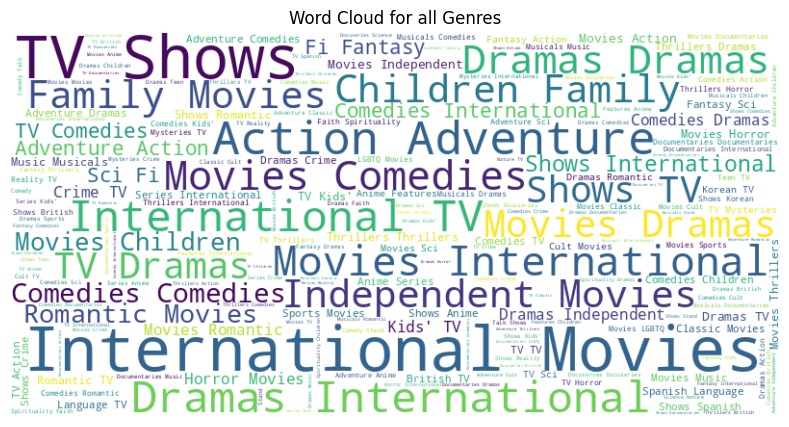

In [27]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)
plt.figure(figsize=(15, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for all Genres')
plt.axis('off')
plt.show()